In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
regressor = tf.keras.models.Sequential()

In [7]:
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(tf.keras.layers.Dropout(0.2))


In [8]:
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

In [9]:
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

In [10]:
regressor.add(tf.keras.layers.LSTM(units = 50))
regressor.add(tf.keras.layers.Dropout(0.2))


In [11]:
regressor.add(tf.keras.layers.Dense(units = 1))

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mse',metrics=['accuracy'])

In [13]:
regressor.fit(X_train, y_train, epochs = 100)

Epoch 1/100
38/38 [==============================] - 13s 119ms/step - loss: 0.0531 - accuracy: 8.3472e-04
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0070 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0060 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0055 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0055 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0057 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0047 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0044 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0048 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0046 - a

In [14]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [16]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


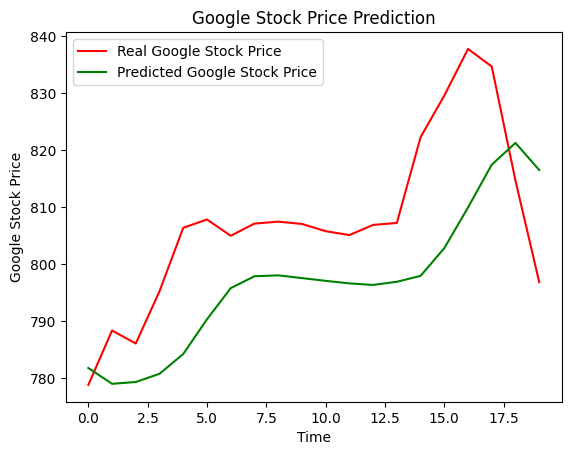

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()